In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/police-arrest-from-2021-2023/Police_Arrests_20240702.csv


In [4]:
# Reading file into a dataframe
p_a = pd.read_csv('/kaggle/input/police-arrest-from-2021-2023/Police_Arrests_20240702.csv')

# Examine the head of the dataframe
print(p_a.head())

   ID Reference Number           Subject's race Subject's gender  \
0                     1                   Asian             Male   
1                     2  Black/African American             Male   
2                     3  Black/African American             Male   
3                     4  Black/African American             Male   
4                     5                   White           Female   

   Subject's age     Ethnicity  District of occurrence  Adjacent to School  \
0             43  NON-HISPANIC                     6.0                   0   
1             23  NON-HISPANIC                     1.0                   0   
2             18  NON-HISPANIC                     1.0                   0   
3             21  NON-HISPANIC                     1.0                   0   
4             38      HISPANIC                     4.0                   0   

  Assigned Division Assigned Bureau Event Date/Time  
0               TOD             FSB   1/1/2021 1:07  
1             

In [5]:
# Count the number of missing values by column
print(p_a.isnull().sum())

ID Reference Number          0
Subject's race               0
Subject's gender             0
Subject's age                0
Ethnicity                    0
District of occurrence     102
Adjacent to School           0
Assigned Division          129
Assigned Bureau           4659
Event Date/Time              0
dtype: int64


In [13]:
# Dropping all rows with missing data for District of occurrence and Assigned Division
p_a.dropna(subset=['District of occurrence','Assigned Division'], inplace=True)

# Dropping a column with missing data
#p_a.drop(['Assigned Bureau'], axis='columns', inplace=True)

#Checking  any missing values
print(p_a.isnull().sum())

ID Reference Number       0
Subject's race            0
Subject's gender          0
Subject's age             0
Ethnicity                 0
District of occurrence    0
Adjacent to School        0
Assigned Division         0
Event Date/Time           0
dtype: int64


In [15]:
p_a.head(20)

,ID Reference Number,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Event Date/Time
0,1,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,1/1/2021 1:07
1,2,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,1/1/2021 0:52
2,3,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,1/1/2021 0:52
3,4,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,1/1/2021 0:52
4,5,White,Female,38,HISPANIC,4.0,0,TOD,1/1/2021 3:00
5,6,White,Female,31,HISPANIC,3.0,0,TPPD,1/1/2021 2:47
6,7,White,Male,37,HISPANIC,6.0,0,GPD,1/1/2021 4:49
7,8,Black/African American,Male,40,NON-HISPANIC,4.0,0,4D,1/1/2021 6:10
8,9,White,Male,34,HISPANIC,3.0,0,3D,1/1/2021 8:55
9,10,Black/African American,Male,23,NON-HISPANIC,3.0,0,3D,1/1/2021 13:54


In [17]:
# How many of each race are represented in the data set?
race_count=p_a.groupby("Subject's race")
race_count["Subject's race"].count()

Subject's race
American Indian/ALSK Natv       33
Asian                          620
Black/African American       11386
Hawaiian/Pacific Islander       20
Unknown                         71
White                        11149
Name: Subject's race, dtype: int64

In [19]:
# Finding out what the average age of men and women.
avg_age_men= p_a[p_a["Subject's gender"]== 'Male']["Subject's age"].mean()

avg_age_women= p_a[p_a["Subject's gender"]== 'Female']["Subject's age"].mean()

print(avg_age_men)
print(avg_age_women)

31.76818058199619
32.02002451982019


In [20]:
race_count=p_a.groupby("Assigned Division")
race_count["Assigned Division"].count()

Assigned Division
1D       925
2D      1848
3D      4309
4D      3894
5D      3491
6D      1760
CED      361
CID       74
FSB        4
GPD     2391
IMTD     463
ISB        3
MCD       75
MCFM      49
MCSO      19
PERS       1
PSCC       1
PSTA      17
RCPD    1278
SID      254
SOD        7
SVID     249
TOD     1033
TPPD     773
Name: Assigned Division, dtype: int64

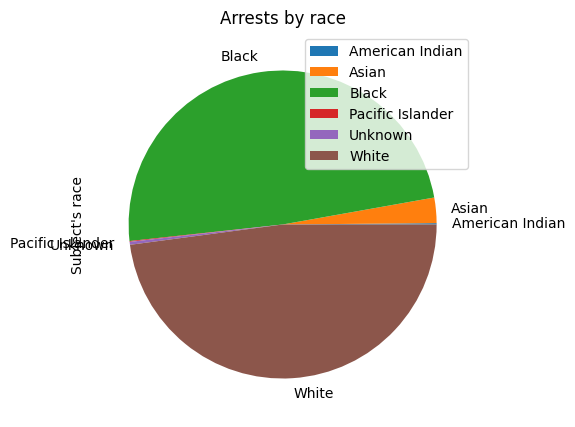

In [31]:
#Plotting a pie chart  of the races arrested
import matplotlib.pyplot as plt
import pandas as pd


p_a=pd.DataFrame({"Subject's race": [33, 620,11386,20,71,11149]},
                 index=['American Indian','Asian','Black','Pacific Islander','Unknown', 'White'])

plot=p_a.plot.pie(y="Subject's race",title="Arrests by race", figsize=(5,5))